In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread('C:/Users/user/Desktop/parmak.png', 0) #görüntü grayscale olarak okundu

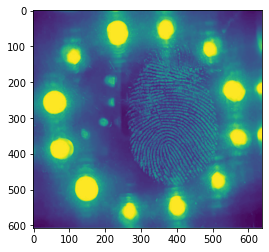

In [3]:
plt.imshow(image) #görüntü gösterildi

In [4]:
cv2.imwrite('grayparmak.png', image) #görüntü kaydedildi

True

In [5]:
histr = cv2.calcHist([image], [0], None, [256], [0, 256]) #görüntünün 0-255 aralıgındaki pixel sayılarının histogramı

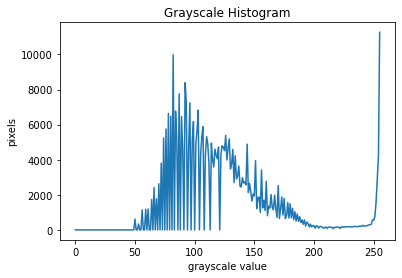

In [6]:
plt.figure() #histogram figuru
plt.title("Grayscale Histogram") #figurun basligi
plt.xlabel("grayscale value") #figur x basligi
plt.ylabel("pixels") #figur y basligi
plt.plot(histr) #histogram ciziliyor
plt.show() #histogram gösteriliyor
#histogram cizimi pixel frekanslarını gösteriyor

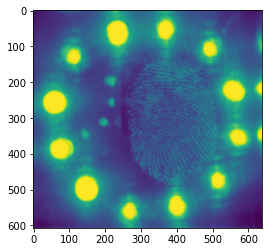

In [7]:
blurred = cv2.GaussianBlur(image, (11, 11), 0) #görüntüye gaussian filtre uygulandı filre boyutu 11x11 sigma X ve sigma y
plt.imshow(blurred)                            #filtre boyutundan hesaplandı

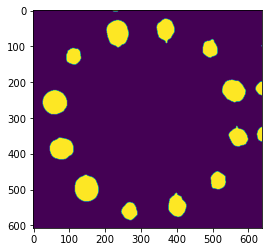

In [8]:
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1] #aydınlık noktaların öne cıkması icin 200 değerinin
plt.imshow(thresh)                                              #üstündeki pixellere 255 beyaz değer atandı  
                                                                #sarı noktaların yok edilmesi icin ugrasıldı 
                                                                #ama basarılamadı

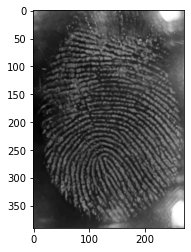

In [9]:
cropped = image[110:500, 250:520] #görüntü dikeyde 110:500 koordinatlarını yatayda 250:520 koordinatlarını alacak 
plt.imshow(cropped, cmap="gray")  #sekilde kırpıldı ve gösterildi

In [10]:
cv2.imwrite('cropped.png', cropped) #cropped görüntü kaydedildi

True

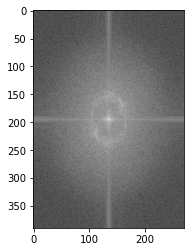

In [11]:
#DFT frekans aralığında filtrelemesini yapabilmek için parmak izinin fourier transformu incelenecek 
f = np.fft.fft2(cropped) #np.fft.fft2 fonksiyonu frekans transform dizisini olusturacak
fshift = np.fft.fftshift(f) #0 frekans duzlemini merkeze cekmek icin f degiskenine shift operasyonunu uygulayacak
magnitude_spectrum = 20*np.log(np.abs(fshift)) #merkeze cekilmis frekans duzlemi magnitude_spectrum formuna sokulur
plt.imshow(magnitude_spectrum, cmap="gray") #magnitude spectrum gösterilir
#magnitude transform incelenince merkezde düsük frekans gözlemlenir

In [12]:
cv2.imwrite('fft.png', magnitude_spectrum) #magnitude spectrum kaydedildi

True

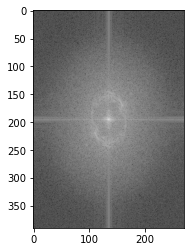

In [13]:
img_float = np.float32(cropped) #kesilmis görüntü float32 sayısal degerlerini iceren matris dizisine cevrilir
dft = cv2.dft(img_float, flags =cv2.DFT_COMPLEX_OUTPUT) #img_float görüntüsünün dft frekans dizisi cıkarılır
dft_shift = np.fft.fftshift(dft) #frekans dizisi merkeze cekilir 
magnitude_spectrum_2 = 20*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])) #merkeze cekilmis frekans dizisinin magnitude spektrumu cıkarılır 
plt.imshow(magnitude_spectrum_2, cmap="gray") #magnitude spectrum gösterilir

In [14]:
cv2.imwrite('dft.png', magnitude_spectrum_2) #magnitude_spectrum_2 kaydedildi

True

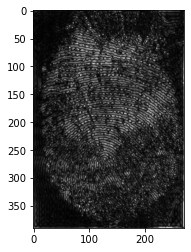

In [15]:
#maske yaratılır
rows, columns = cropped.shape #kesilmis görüntünün yatay ve dikey koordinatları alınır
crows, ccolumns = rows//2, columns//2 #merkez koordinatları bulunur
mask = np.ones((rows, columns, 2), np.uint8) #high pass filter maskesini oluşturmak icin kesilmis görüntünün koordinatlarını
                                             #tasıyan ve yalnızca 1 degerlerinden olusan bir matris tanımlanır
mask[crows-30:crows+30, ccolumns-30:ccolumns+30] = 0 #maskenin merkez koordinatları iceren kesit alanına 0 degeri atanır 
                                                     #maskenin kesit alanı merkez koordinatlardan 30'luk değerlerle
                                                     #ayrılır         

#maske uygulanır
fshift = dft_shift*mask #frekans dizisine maske uygulanır

f_inshift = np.fft.ifftshift(fshift) #shift operasyonu tersine cevrilir
img_back = cv2.idft(f_inshift) #f_inshift degiskenine ters dft uygulanır 
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1]) #ters dft frekans dizisinin vektör büyüklügü hesaplanır
plt.imshow(img_back, cmap="gray") #img_back degiskeni gösterilir

In [16]:
plt.imsave('dftparmak_2.png', img_back, cmap="gray") #img_back kaydedildi

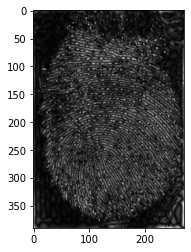

In [17]:
#maske yaratılır
rows, columns = cropped.shape #kesilmis görüntünün yatay ve dikey koordinatları alınır
crows, ccolumns = rows//2, columns//2 #merkez koordinatları bulunur
mask = np.ones((rows, columns, 2), np.uint8) #high pass filter maskesini oluşturmak icin kesilmis görüntünün koordinatlarını
                                             #tasıyan ve yalnızca 1 degerlerinden olusan bir matris tanımlanır
mask[crows-15:crows+15, ccolumns-15:ccolumns+15] = 0 #maskenin merkez koordinatları iceren kesit alanına 0 degeri atanır 
                                                     #maskenin kesit alanı bu sefer koordinatlardan 15'lik degerlerle
                                                     #ayrılır
#maske uygulanır
fshift = dft_shift*mask #frekans dizisine maske uygulanır

f_inshift = np.fft.ifftshift(fshift) #shift operasyonu tersine cevrilir
img_back = cv2.idft(f_inshift) #f_inshift degiskenine ters dft uygulanır 
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1]) #ters dft frekans dizisinin vektör büyüklügü hesaplanır
plt.imshow(img_back, cmap="gray") #img_back degiskeni gösterilir

In [18]:
plt.imsave('dftparmak_4.png', img_back, cmap="gray") #img_back görüntüsü kaydedilir 

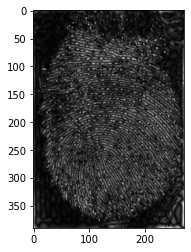

In [19]:
plt.imshow(img_back, cmap="gray") #en son yaratılan img_back görüntüsü gösterilir

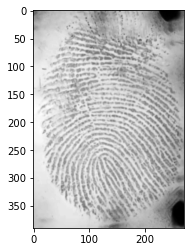

In [20]:
#görüntü siyah beyaz olduğu ve standartlara benzemediği için cropped image tersine döndürülür
not_cropped = cv2.bitwise_not(cropped) #not operasyonu cropped image e uygulanır
plt.imshow(not_cropped, cmap="gray")

In [21]:
cv2.imwrite('not_cropped.png', not_cropped) #not cropped image kaydedilir

True

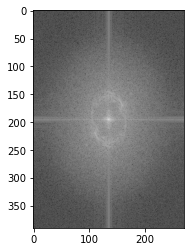

In [22]:
#aynı islemler not_cropped image e uygulanır yalnız bu sefer fft fourier transformu yerine dft fourier transformu 
#magnitude spectrum icin kodlanır

img_float_2 = np.float32(not_cropped) #not_cropped image float32 sayısal degerlerini iceren matris dizisine cevrilir
dft_2 = cv2.dft(img_float_2, flags = cv2.DFT_COMPLEX_OUTPUT) #img_float_2 görüntüsünün dft frekans dizisi cıkarılır
dft_shift_2 = np.fft.fftshift(dft_2) #frekans dizisi merkeze cekilir 
magnitude_spectrum_3 = 20*np.log(cv2.magnitude(dft_shift_2[:, :, 0], dft_shift_2[:, :, 1])) #merkeze cekilmis frekans dizisinin magnitude spektrumu cıkarılır 
plt.imshow(magnitude_spectrum_3, cmap="gray") #magnitude spectrum gösterilir
#not_cropped image magnitude spectrum görseli cropped image den neredeyse farksızdır

In [23]:
cv2.imwrite('magnitude_spectrum_3.png', magnitude_spectrum_3) #magnitude_spectrum_3 görüntüsü kaydedilir

True

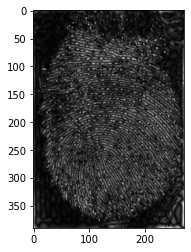

In [24]:
#gözlemlere dayanarak 15 degerini iceren high pass filter maskesini uygulanır
rows, cols = not_cropped.shape #not_cropped image yatay ve dikey eksen koordinatları alınır
crows, ccols = rows//2, cols//2 #yatay ve dikey eksen koordinatları yarılanır

not_cropped_mask = np.ones((rows, cols, 2), np.uint8) #not_cropped image yatay ve dikey eksen koordinatlarını iceren 
                                                      #ve sadece 1 değerlerinden olusan bir maske yaratılır
not_cropped_mask[crows-15:crows+15, ccols-15:ccols+15] = 0 #high pass filtresi icin yarılanmıs koordinatlara 15 eklendi 
                                                           #ve cıkarıldı maskenin merkez koordinatlarını iceren kısmına 0 atandı
not_fshift = dft_shift_2*not_cropped_mask #maske dft_shift_2 dft degerine uygulanır             
inot_fshift = np.fft.ifftshift(not_fshift) #not_shift degerinin frakansı tekrar eski yerine sol üst koseye tasınır
not_img_back = cv2.idft(inot_fshift) #not_shift degerinin ters dft'si alınır
not_img_back = cv2.magnitude(not_img_back[:, :, 0], not_img_back[:, :, 1]) #not_img_back degerinin matris vektörü hesaplanır 
plt.imshow(not_img_back, cmap="gray") #not_img_back gösterilir
#not_img_back görüntüsüyle img_back görüntüsü arasındaki fark yakalanamadı
#magnitude spectrumlarının aynı olması cropped image tersini etkili kılamadı

In [25]:
plt.imsave('dftparmak_5.png', not_img_back, cmap="gray") #dftparmak_5 görüntüsü kaydedilir

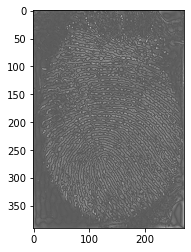

In [26]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) #kenar keskinlestirme matrisi yaratılır
img_edge = cv2.filter2D(not_img_back, -1, kernel) #matris not_img_back görüntüsüne uygulanır
plt.imshow(img_edge, cmap="gray") #img_edge görüntüsü gösterilir

In [27]:
plt.imsave('parmak_6.png', img_edge, cmap="gray") #parmak_6 görüntüsü kaydedilir 